In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,plot_roc_curve,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
years_of_exp = [np.round(x) for x in data["YearsExperience"]]

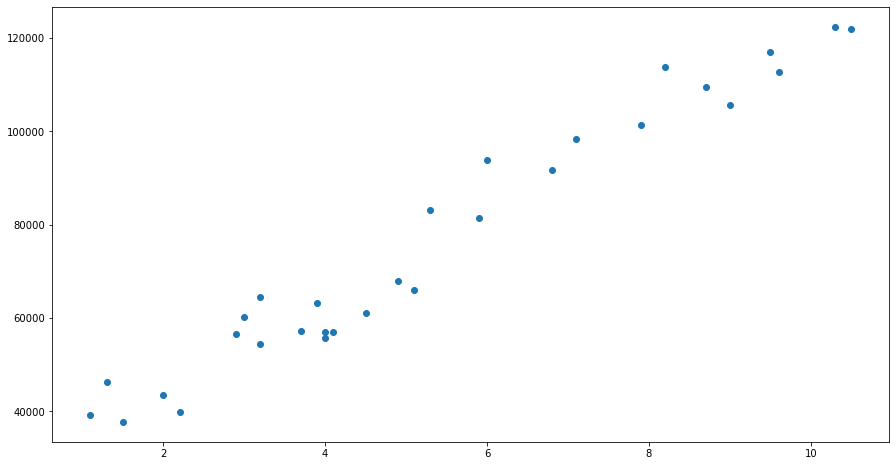

In [8]:
plt.figure(figsize=(15,8))

plt.scatter(data.YearsExperience,data.Salary)

Text(0.5, 1.0, 'Years of Experience vs Salary')

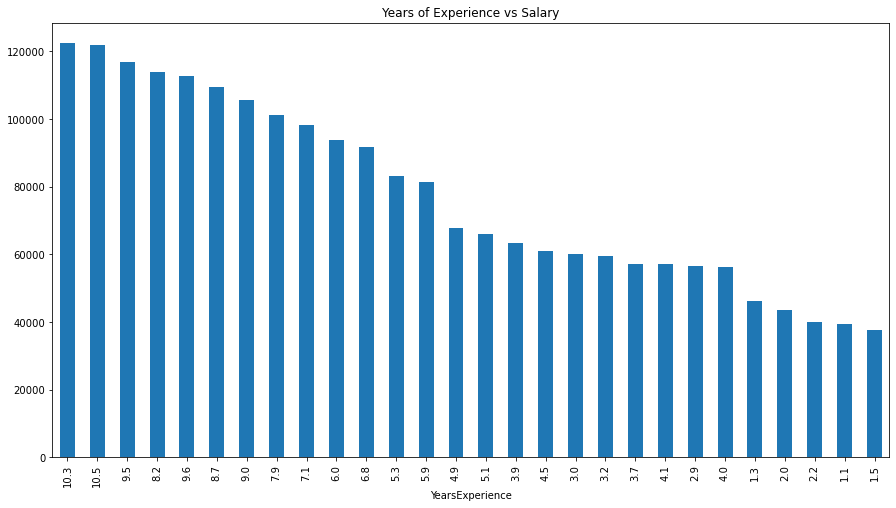

In [9]:
# Average Salary with Years of Experience

plt.figure(figsize=(15,8))
data.groupby("YearsExperience")["Salary"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Years of Experience vs Salary")

Text(0.5, 1.0, 'Salary Spread with Experience')

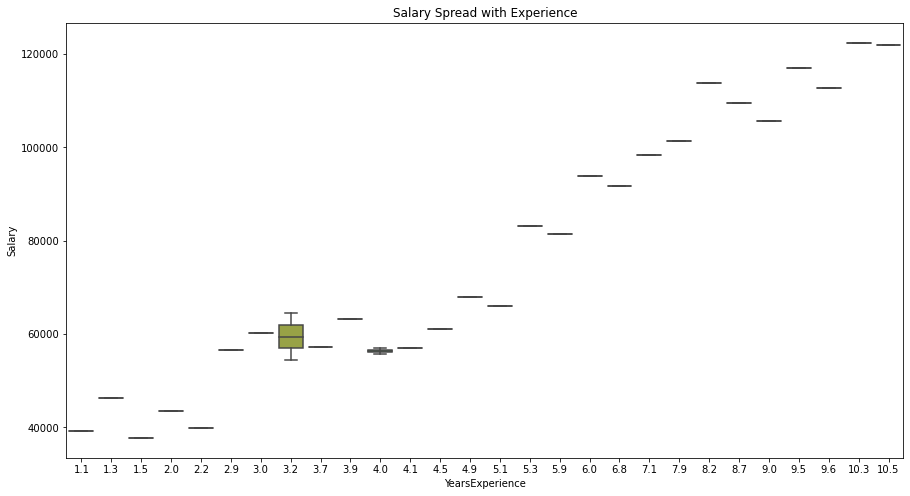

In [10]:
# Salary Spread

plt.figure(figsize=(15,8))
sns.boxplot(x=data.YearsExperience,y=data.Salary)
plt.title("Salary Spread with Experience")

In [11]:
pd.value_counts(data["YearsExperience"])

4.0     2
3.2     2
9.6     1
6.8     1
2.0     1
3.0     1
4.5     1
6.0     1
9.0     1
9.5     1
10.5    1
5.9     1
8.7     1
3.7     1
4.1     1
5.1     1
2.2     1
7.1     1
8.2     1
7.9     1
2.9     1
1.3     1
10.3    1
3.9     1
1.1     1
5.3     1
4.9     1
1.5     1
Name: YearsExperience, dtype: int64

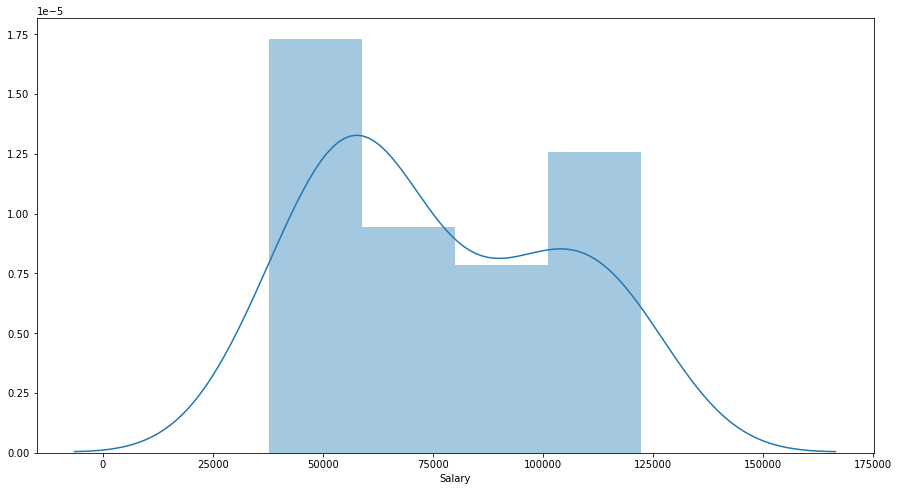

In [12]:
plt.figure(figsize=(15,8))

sns.distplot(data.Salary)

In [13]:
np.mean(data.Salary)

76003.0

In [14]:
data.Salary.describe(percentiles=[0,0.1,0.2,0.3,0.4,0.5,0.5724,0.573,0.6,0.7,0.75,0.8,0.85,0.9,0.95,1])

count         30.000000
mean       76003.000000
std        27414.429785
min        37731.000000
0%         37731.000000
10%        43161.600000
20%        55524.200000
30%        57043.800000
40%        60726.600000
50%        65237.000000
57.24%     75987.630000
57.3%      76221.225000
60%        82053.000000
70%        95239.900000
75%       100544.750000
80%       106351.800000
85%       111513.600000
90%       114127.700000
95%       119665.650000
100%      122391.000000
max       122391.000000
Name: Salary, dtype: float64

In [15]:
#Observation

# 1 --> Salary distribution seems to be little righ skewed, showing variance in the dataset
# 2 --> 57.24% points are below mean of salary
# 3 --> Min Salary = 37731 and Max Salary = 122391
# 4 --> for experience of 3.2 and 4.0 we have 2 salary valuess

In [16]:
# train test split

X = data["YearsExperience"]
Y = data["Salary"]

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
# building the model

LinReg = LinearRegression()
LinReg.fit(x_train[:,np.newaxis],y_train[:,np.newaxis])

LinearRegression()

In [18]:
predictions = LinReg.predict(x_test[:,np.newaxis])
predictions = predictions.reshape(6)

Text(0.5, 1.0, 'Actual vs Predicted Salary')

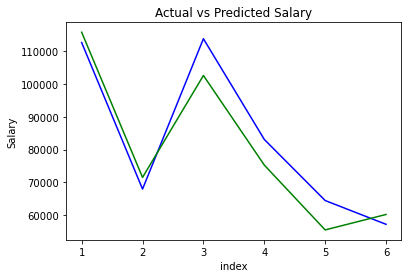

In [19]:
# Plotiing actual values vs predictions

c = [i for i in range(1, len(y_test)+1,1)]

plt.plot(c, y_test,color="blue")
plt.plot(c,predictions,color="green")
plt.xlabel("index")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary")

Text(0.5, 1.0, 'Error')

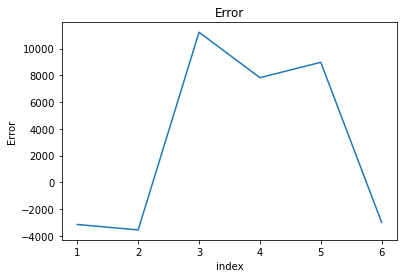

In [20]:
# plotting the error

error = y_test - predictions
c = [i for i in range(1, len(y_test)+1,1)]
plt.plot(c,error)
plt.xlabel("index")
plt.ylabel("Error")
plt.title("Error")

In [21]:
# Calculate MSE and RMSE nad R square

print("Mean Square Error : {}".format(mean_squared_error(y_test,predictions)))

print("Root Mean Square Error : {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

print("Fitness of our model is : {}%".format(np.round(r2_score(y_test,predictions),2)*100))

Mean Square Error : 49830096.85590839
Root Mean Square Error : 7059.04362190151
Fitness of our model is : 90.0%
